<a href="https://colab.research.google.com/github/HarinisarathyP/traffic-light--object-detection-using-yolov8/blob/main/roadsigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
if 'COLAB_GPU' in os.environ:
  print("available")
else:
  print("not available")

available


In [ ]:
!pip install ultralytics==8.3.183

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


In [ ]:
%pwd

'/content'

In [ ]:
!mkdir roadsigndetection

mkdir: cannot create directory ‘roadsigndetection’: File exists


In [ ]:
!ls

roadsigndetection


In [ ]:
path="/content/roadsigndetection"

In [ ]:
%pwd

'/content'

In [ ]:
os.chdir("/content/roadsigndetection")
%pwd

'/content/roadsigndetection'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4PT3iIv1dWMxrg4GpY2h")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
os.chdir("/content/roadsigndetection/Self-Driving-Cars-6")

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

In [ ]:
!ls '/content/roadsigndetection/Self-Driving-Cars-6/runs/detect/train2/'

args.yaml			 labels_correlogram.jpg  val_batch0_labels.jpg
BoxF1_curve.png			 labels.jpg		 val_batch0_pred.jpg
BoxP_curve.png			 results.csv		 val_batch1_labels.jpg
BoxPR_curve.png			 results.png		 val_batch1_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1.jpg	 val_batch2_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 weights


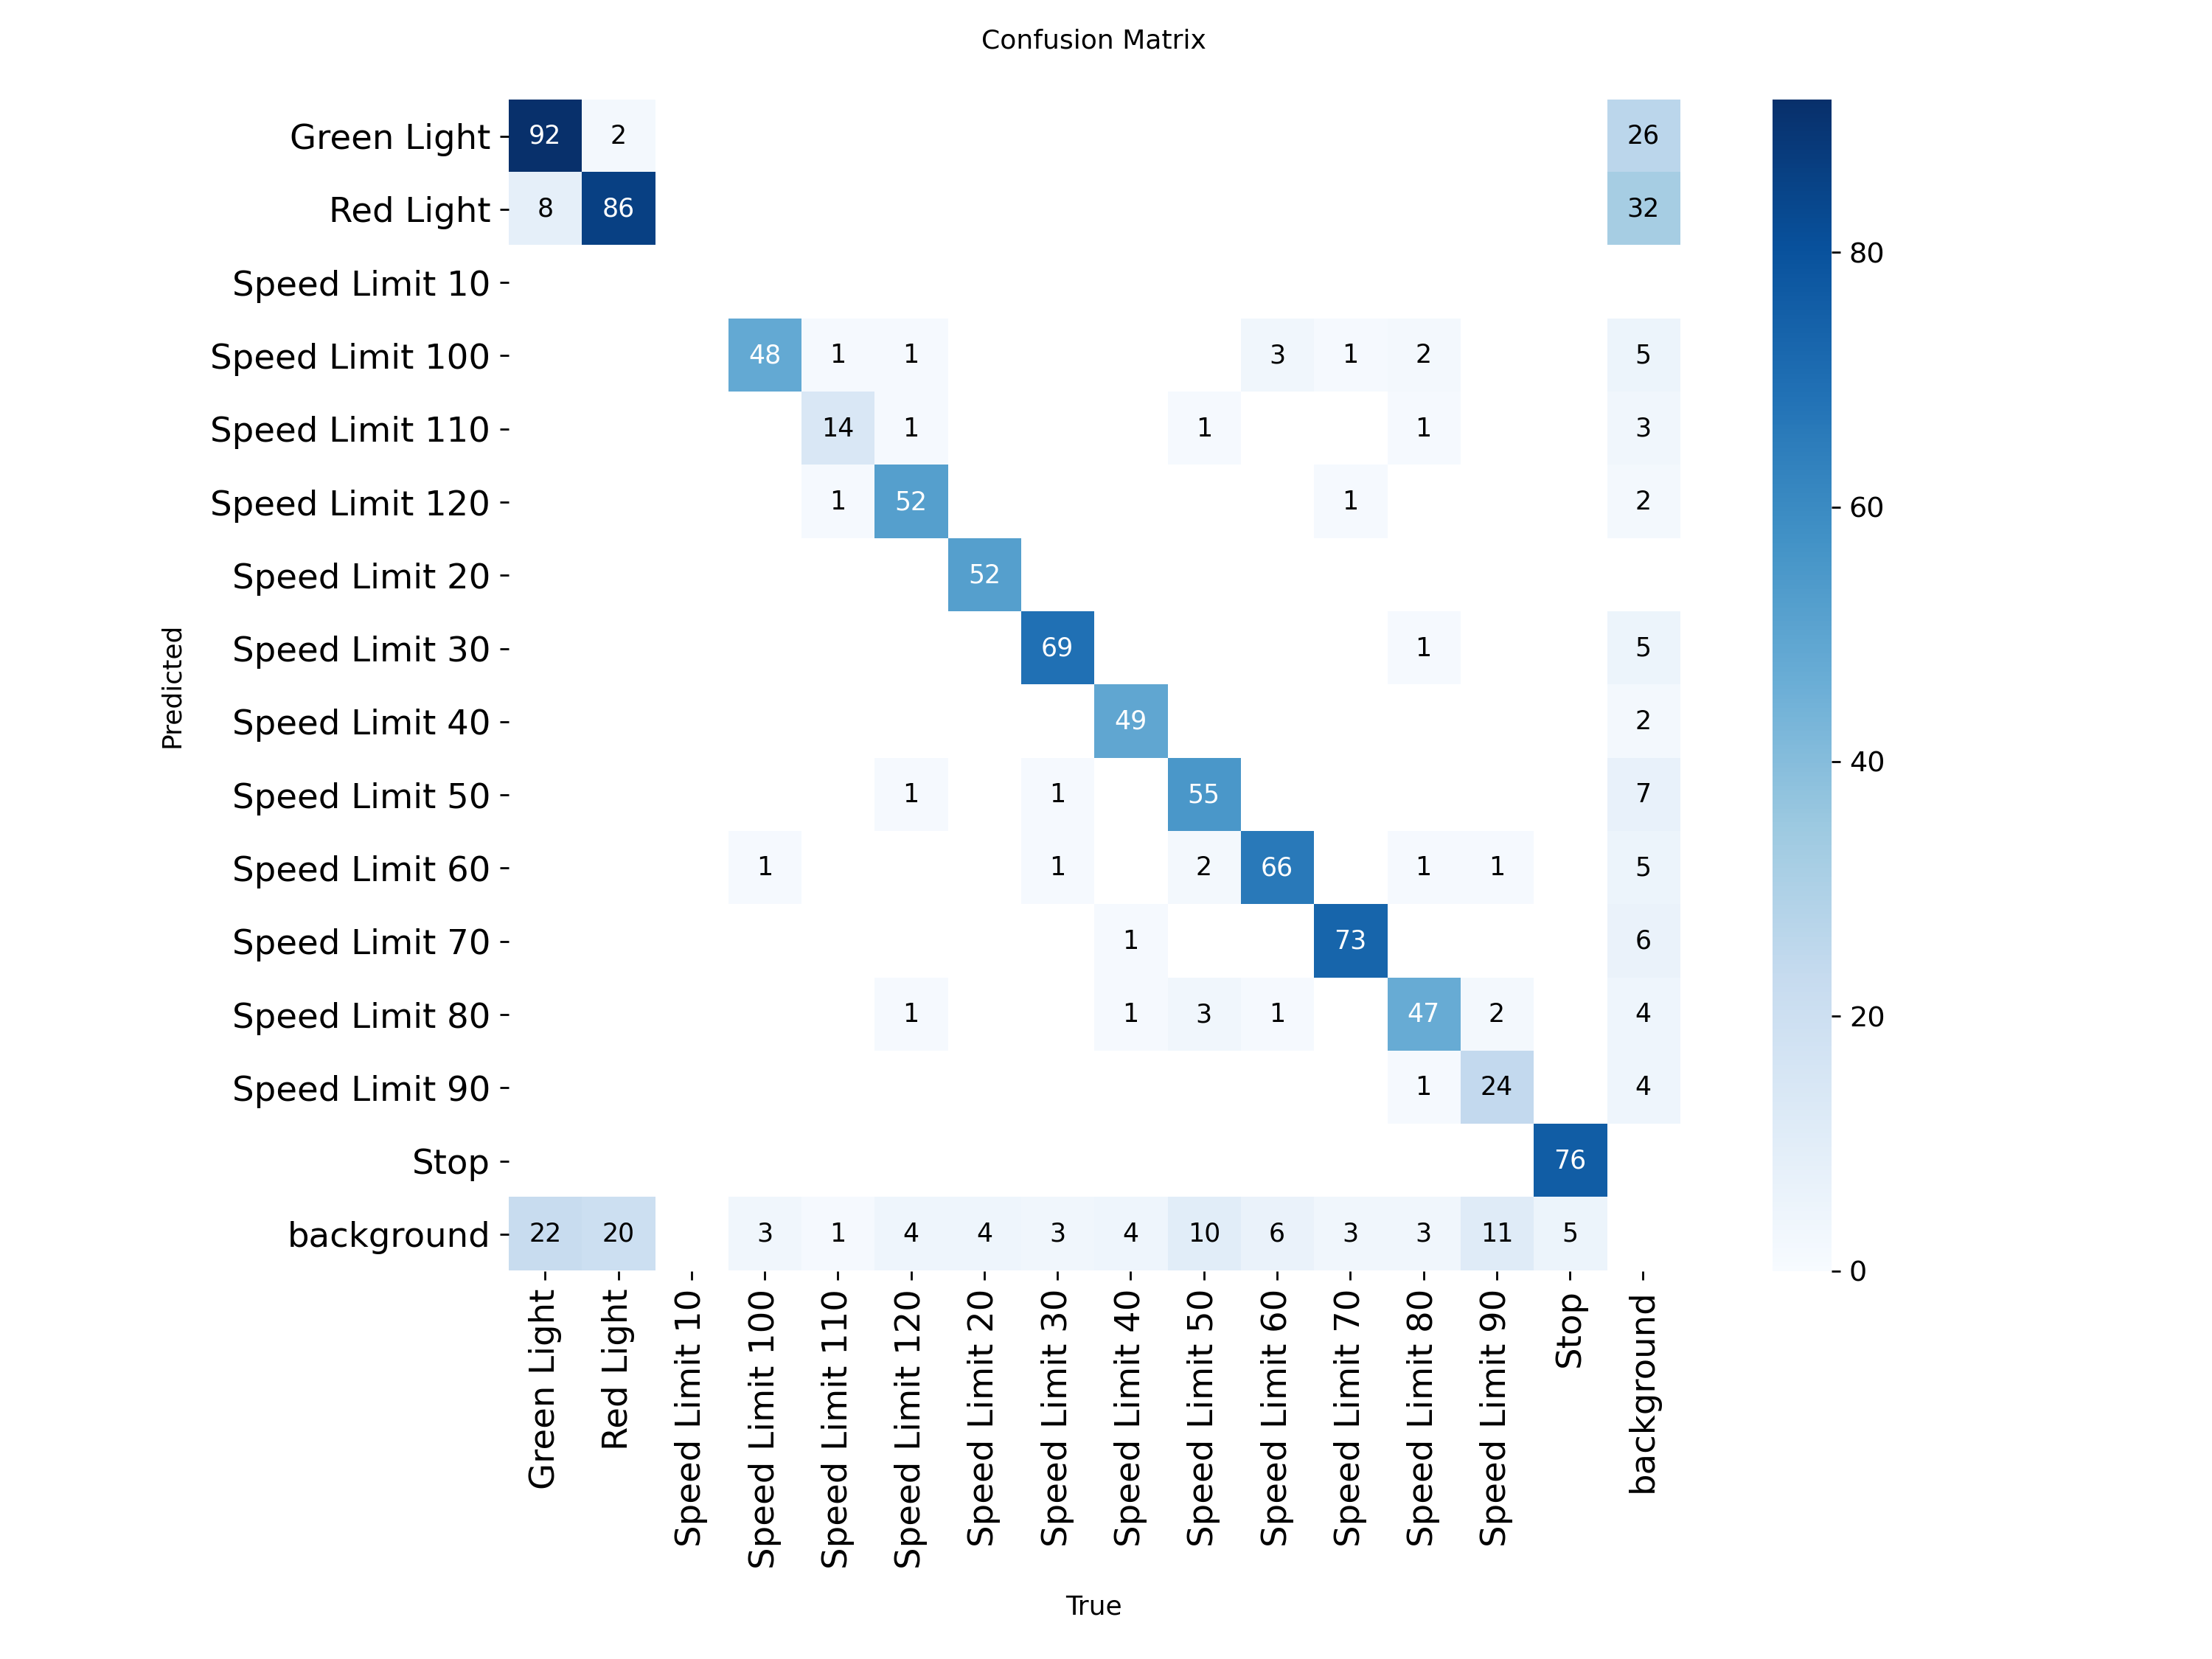

In [ ]:
resultData="/content/roadsigndetection/Self-Driving-Cars-6/runs/detect/train2/"
from IPython.display import Image,display
Image(filename=f'{resultData}confusion_matrix.png')

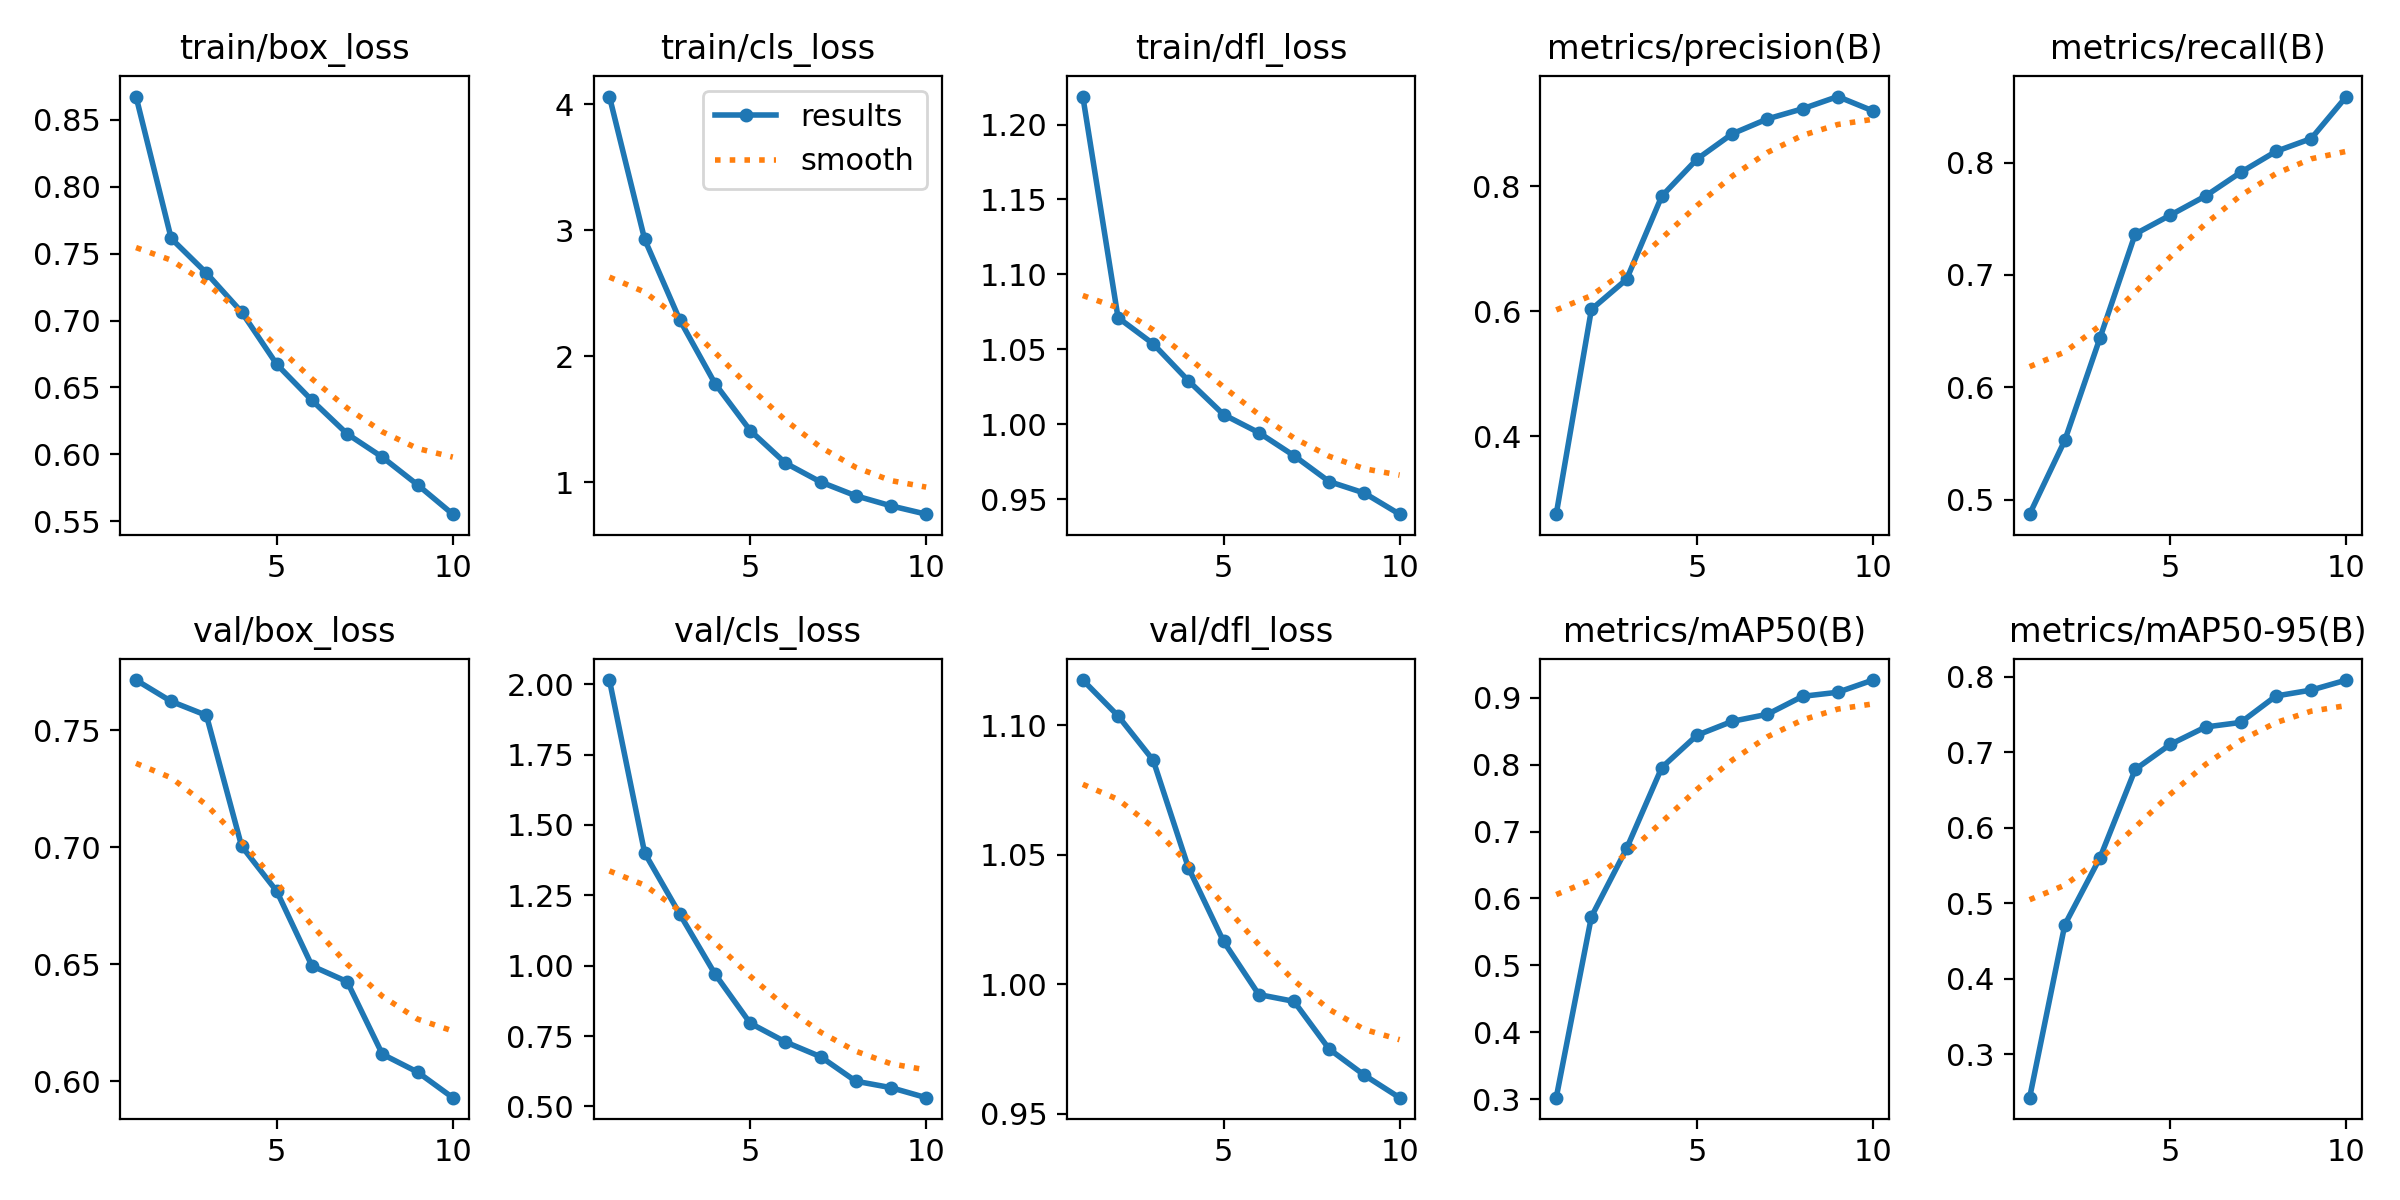

In [ ]:
Image(filename=f'{resultData}results.png')

In [ ]:
import pandas as pd
df=pd.read_csv(f'{resultData}results.csv')
print(df.tail(1))

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
9     10  620.437         0.55526         0.74738         0.93988   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
9               0.92088            0.85879            0.9263   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
9              0.79595       0.59293       0.53101       0.95621  0.000057   

     lr/pg1    lr/pg2  
9  0.000057  0.000057  


In [ ]:
%pwd

'/content/roadsigndetection/Self-Driving-Cars-6'

In [ ]:
os.chdir("/content")

In [ ]:
%pwd

'/content'

In [ ]:
!mkdir manualtestingdata

mkdir: cannot create directory ‘manualtestingdata’: File exists


In [ ]:
os.chdir("/content/manualtestingdata")

In [ ]:
URL="https://drive.google.com/file/d/1ydEJu04eetILzX8y46CILBGyJl74UNGr/view?usp=sharing"
id='1ydEJu04eetILzX8y46CILBGyJl74UNGr'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ydEJu04eetILzX8y46CILBGyJl74UNGr' -O input.mp4

--2025-08-22 11:25:52--  https://drive.google.com/uc?export=download&id=1ydEJu04eetILzX8y46CILBGyJl74UNGr
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.100, 142.250.141.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ydEJu04eetILzX8y46CILBGyJl74UNGr&export=download [following]
--2025-08-22 11:25:52--  https://drive.usercontent.google.com/download?id=1ydEJu04eetILzX8y46CILBGyJl74UNGr&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1938255 (1.8M) [video/mp4]
Saving to: ‘input.mp4’

input.mp4           100%[===================>]   1.85M  --.-KB/s    in 0.1s   

In [ ]:
weightsPath="/content/roadsigndetection/Self-Driving-Cars-6/runs/detect/train2/weights"
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=.25 source='input.mp4' save=True

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/192) /content/manualtestingdata/input.mp4: 384x640 1 Green Light, 1 Red Light, 38.1ms
video 1/1 (frame 2/192) /content/manualtestingdata/input.mp4: 384x640 1 Green Light, 1 Red Light, 7.8ms
video 1/1 (frame 3/192) /content/manualtestingdata/input.mp4: 384x640 2 Green Lights, 1 Red Light, 7.2ms
video 1/1 (frame 4/192) /content/manualtestingdata/input.mp4: 384x640 2 Green Lights, 1 Red Light, 6.6ms
video 1/1 (frame 5/192) /content/manualtestingdata/input.mp4: 384x640 2 Green Lights, 1 Red Light, 6.3ms
video 1/1 (frame 6/192) /content/manualtestingdata/input.mp4: 384x640 2 Green Lights, 1 Red Light, 6.4ms
video 1/1 (frame 7/192) /content/manualtestingdata/input.mp4: 384x640 2 Green Lights, 1 Red Light, 7.0ms
video 1/1 (frame 8/192) /content/manualtestingdata/input.mp4: 384x640 2 Green Lights, 1 Red Light, 6.5

In [ ]:
from google.colab import files
files.download("/content/manualtestingdata/runs/detect/predict2/input.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>